
# A First Application: Classifying Iris Species ###############

- Prepared By: Ammar Nassan Alhaj Ali.
- Date: 2020-10-8.
- References: 1-introduction to machine learning with python a guide for data scientists 2017 (Andreas C. Müller and Sarah Guido).


# 1-The problem
Let’s assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. 
She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all measured in centimeters, see the figure.1.

![iris](iris.jpg)

Figure.1 Parts of the iris flower

- Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known so that we can predict the species for a new iris.
- The possible outputs (different species of irises) are called classes. Every iris in the dataset belongs to one of three classes, ('setosa' 'versicolor' 'virginica'),so this problem is a three-class classification problem.
- The desired output for a single data point (an iris) is the species of this flower. For a particular data point, the species it belongs to is called its label.






# 2-The model
## 1-Task1:Meet the Data
-  It is included in scikit-learn in the datasets module. We can load it by calling the load_iris function:

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

- The iris object that is returned by load_iris is a Bunch object, which is very similar to a dictionary. It contains keys and values:

In [177]:
#--It contains keys and values: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
print(iris.keys())

#--The feature_names are a list of strings, giving the description of each feature
print(iris['feature_names'])

#--The value with key target_names is an array of strings, containing the species of flower that we want to predict:
print(iris['target_names'])

#--The rows * columns,
print(iris['data'].shape)

#--numpy array: numpy.ndarray
print(type(iris['data']))

#--Here are the feature values for the first five samples:
print(iris['data'][:5])

#--Here are the target values for the first five samples:
print(iris['target'][:5])

#--Here are the target Name for the first five samples:
print(iris['target_names'][:5])


iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_dataframe)
X = iris.data
Y = iris.target

print(X)
#print(Y)



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2      

In [178]:
#train_test_split: is a function in Sklearn model selection for splitting data arrays into two
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],train_size=0.75,random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


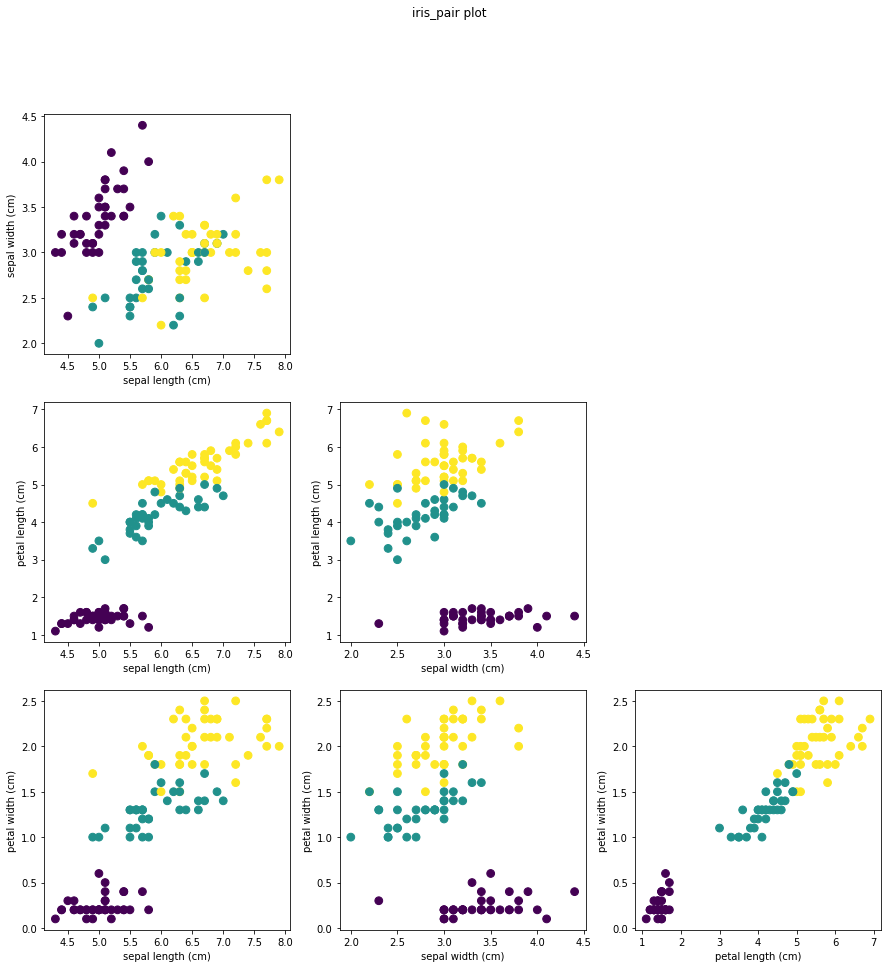

In [179]:
#### Look at your data ###
#In the real world, inconsistencies in the data and unexpected measurements are very common.
#One of the best ways to inspect data is to visualize it. One way to do this is by using a scatter plot.

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pair plot")


# First Column
ax[0,0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=60)
ax[0,0].set_xlabel(iris['feature_names'][0])
ax[0,0].set_ylabel(iris['feature_names'][1])

ax[1,0].scatter(X_train[:,0], X_train[:,2], c=y_train, s=60)
ax[1,0].set_xlabel(iris['feature_names'][0])
ax[1,0].set_ylabel(iris['feature_names'][2])

ax[2,0].scatter(X_train[:,0], X_train[:,3], c=y_train, s=60)
ax[2,0].set_xlabel(iris['feature_names'][0])
ax[2,0].set_ylabel(iris['feature_names'][3])


# Second Column
ax[0, 1].set_visible(False)

ax[1,1].scatter(X_train[:,1], X_train[:,2], c=y_train, s=60)
ax[1,1].set_xlabel(iris['feature_names'][1])
ax[1,1].set_ylabel(iris['feature_names'][2])

ax[2,1].scatter(X_train[:,1], X_train[:,3], c=y_train, s=60)
ax[2,1].set_xlabel(iris['feature_names'][1])
ax[2,1].set_ylabel(iris['feature_names'][3])


# Third Column
ax[0,2].set_visible(False)

ax[1,2].set_visible(False)

ax[2,2].scatter(X_train[:,2], X_train[:,3], c=y_train, s=60)
ax[2,2].set_xlabel(iris['feature_names'][2])
ax[2,2].set_ylabel(iris['feature_names'][3])

fig.show()

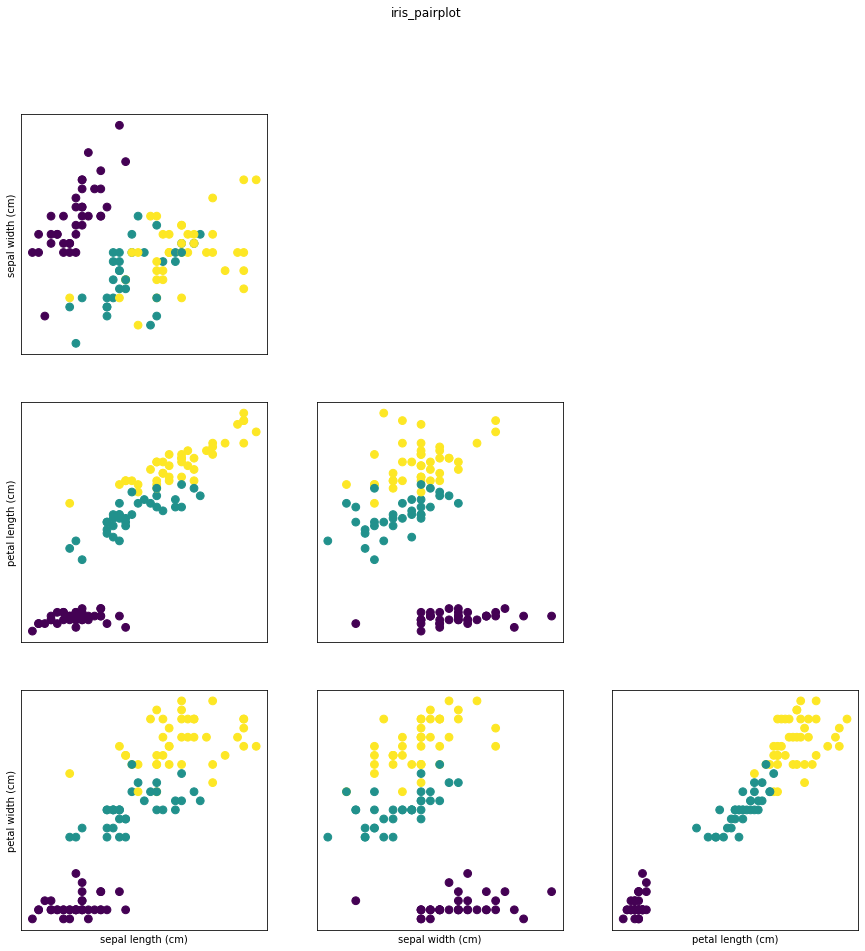

In [180]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())

        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)
fig.show()

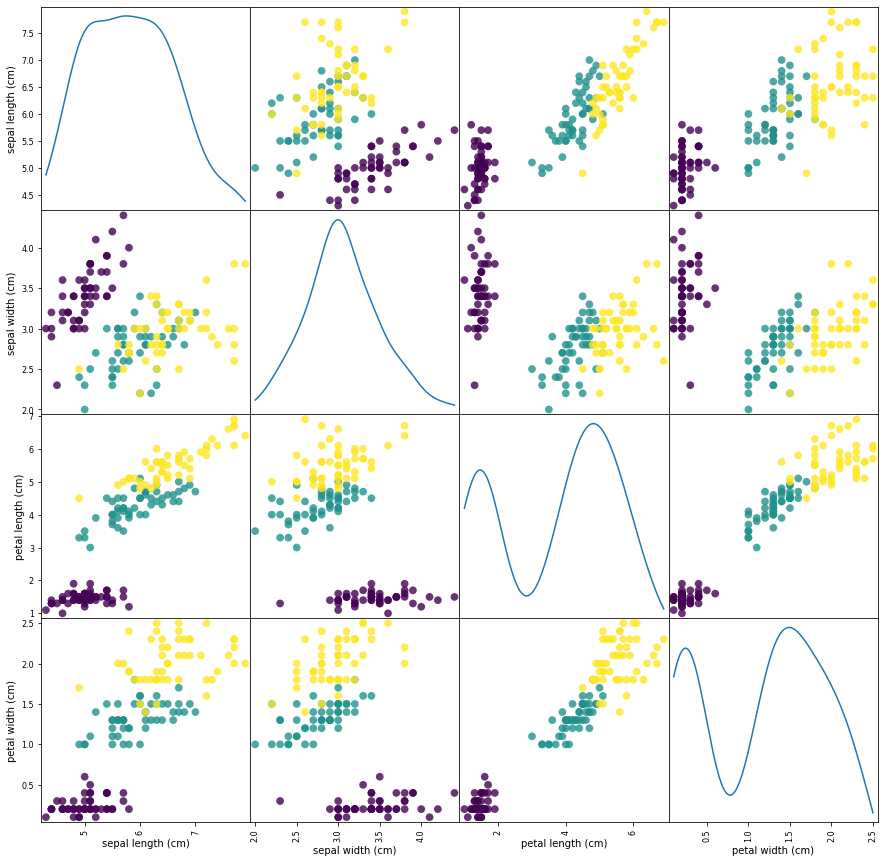

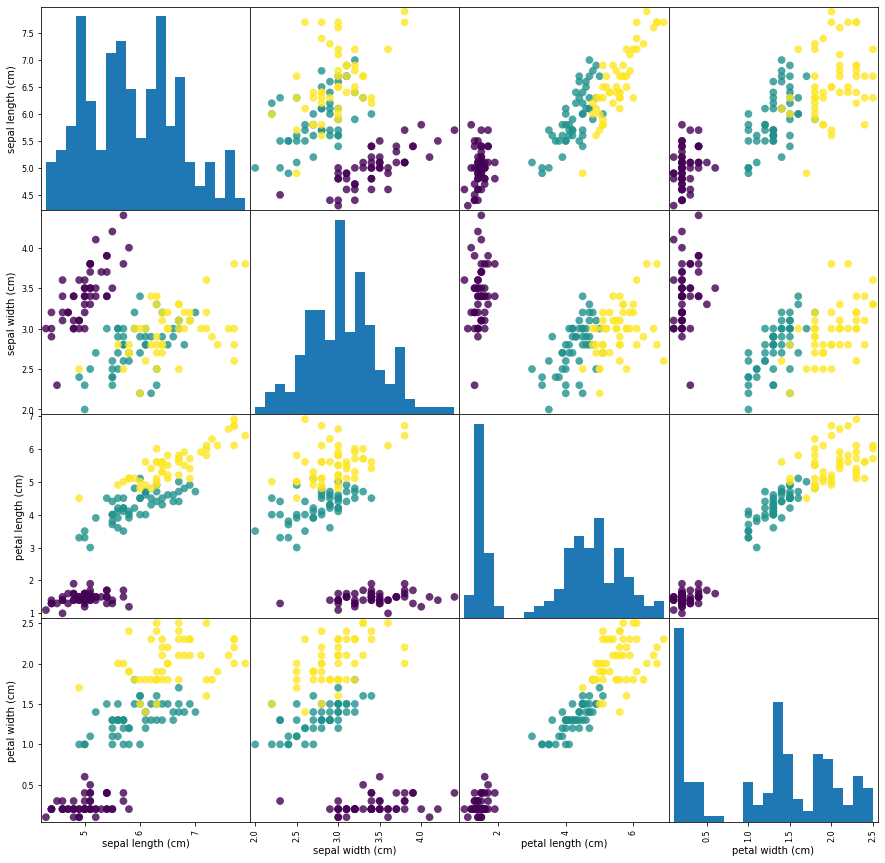

In [181]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15), marker="o",diagonal='kde', s=60, alpha=.8)

grr = pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15), marker="o",hist_kwds={'bins': 20}, s=60, alpha=.8)

In [182]:
# we can see that the three classes seem to be relatively well separated
# using the sepal and petal measurements.
# This means that a machine learning model will likely be able to learn to separate them.

In [183]:
#### Building your irst model: k nearest neighbors ####
#There are many classification algorithms in scikit-learn that we could use.
#Here we will use a k nearest neighbors classifier, which is easy to understand

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [185]:
#To build the model on the training set, we call the fit method of the knn object,
#which takes as arguments the numpy array X_train containing the training data and
#the numpy array y_train of the corresponding training labels:

In [186]:
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=4, p=2, weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=4)

In [187]:
##### Making predictions ######
#Imagine we found an iris in the wild with a sepal length of 5cm,
#  a sepal width of 2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would this be?

X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape
#To make prediction we call the predict method of the knn object:
prediction = knn.predict(X_new)
print(prediction)
print(iris['target_names'][prediction])


[0]
['setosa']


In [188]:
###Evaluating the model###
#We can measure how well the model works by computing the
#accuracy, which is the fraction of flowers for which the right species was predicted:
y_pred = knn.predict(X_test)
print(y_pred)
print(np.mean(y_pred == y_test))
#We can also use the score method of the knn object, which will compute the test set accuracy for us:
print(knn.score(X_test, y_test))


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
0.9736842105263158
0.9736842105263158
